### Bibliotecas

In [39]:
# tratamento de dados
import pandas as pd
import numpy as np

# dataviz
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

### Importando os dados

In [40]:
# lendo os dados
df_petroleo = pd.read_csv(r'https://raw.githubusercontent.com/torvess/Tech_Challeng_FIAP_Fase_04/refs/heads/main/Dados/dados_petroleo.csv')

In [41]:
# conhecendo os dados
print(f'Número de linhas: {df_petroleo.shape[0]:,}')
print(f'Número de colunas: {df_petroleo.shape[1]}')

print('                                          ')

print(f'Data mínima: {df_petroleo.data.min()}')
print(f'Data máxima: {df_petroleo.data.max()}')

Número de linhas: 11,278
Número de colunas: 2
                                          
Data mínima: 1987-05-20
Data máxima: 2024-10-15


In [42]:
df_petroleo.head()

,data,preco
0,2024-10-15,73.68
1,2024-10-12,78.47
2,2024-10-11,80.27
3,2024-10-10,79.45
4,2024-10-09,77.06


In [43]:
# nenhum valor nulo
df_petroleo.isnull().sum().sum()

0

In [44]:
# nenhum valor duplicado
df_petroleo.duplicated().sum().sum()

0

In [45]:
# verificando os tipos de dados
df_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    11278 non-null  object 
 1   preco   11278 non-null  float64
dtypes: float64(1), object(1)
memory usage: 176.3+ KB


In [46]:
df_petroleo['data'] = pd.to_datetime(df_petroleo['data'], format='%Y-%m-%d')

### Análise exploratória dos dados

In [47]:
# criando um df para fazer alteraçoes
dados_petroleo = df_petroleo.copy()

In [48]:
dados_petroleo.head(3)

,data,preco
0,2024-10-15,73.68
1,2024-10-12,78.47
2,2024-10-11,80.27


In [49]:
dias_da_semana = {
    0: 'segunda-feira',
    1: 'terça-feira',
    2: 'quarta-feira',
    3: 'quinta-feira',
    4: 'sexta-feira',
    5: 'sábado',
    6: 'domingo'
}

# criando colunas necessarias para a analise
dados_petroleo = dados_petroleo.assign(
                                    semana_ano = dados_petroleo.data.dt.isocalendar().week,
                                    dia_semana = dados_petroleo.data.dt.isocalendar().day,
                                    nome_dia = dados_petroleo.data.dt.isocalendar().day.apply(lambda x: dias_da_semana.get(x)),
                                    ano = dados_petroleo.data.dt.isocalendar().year,
                                    mes = dados_petroleo.data.dt.month,
                                    nome_mes = dados_petroleo.data.dt.strftime('%B')
                                        )

# reordenando as colunas
dados_petroleo = dados_petroleo[['ano', 'mes', 'nome_mes', 'semana_ano', 'dia_semana', 'nome_dia', 'data', 'preco']]

In [50]:
dados_petroleo.head(2)

,ano,mes,nome_mes,semana_ano,dia_semana,nome_dia,data,preco
0,2024,10,outubro,42,2,quarta-feira,2024-10-15,73.68
1,2024,10,outubro,41,6,domingo,2024-10-12,78.47


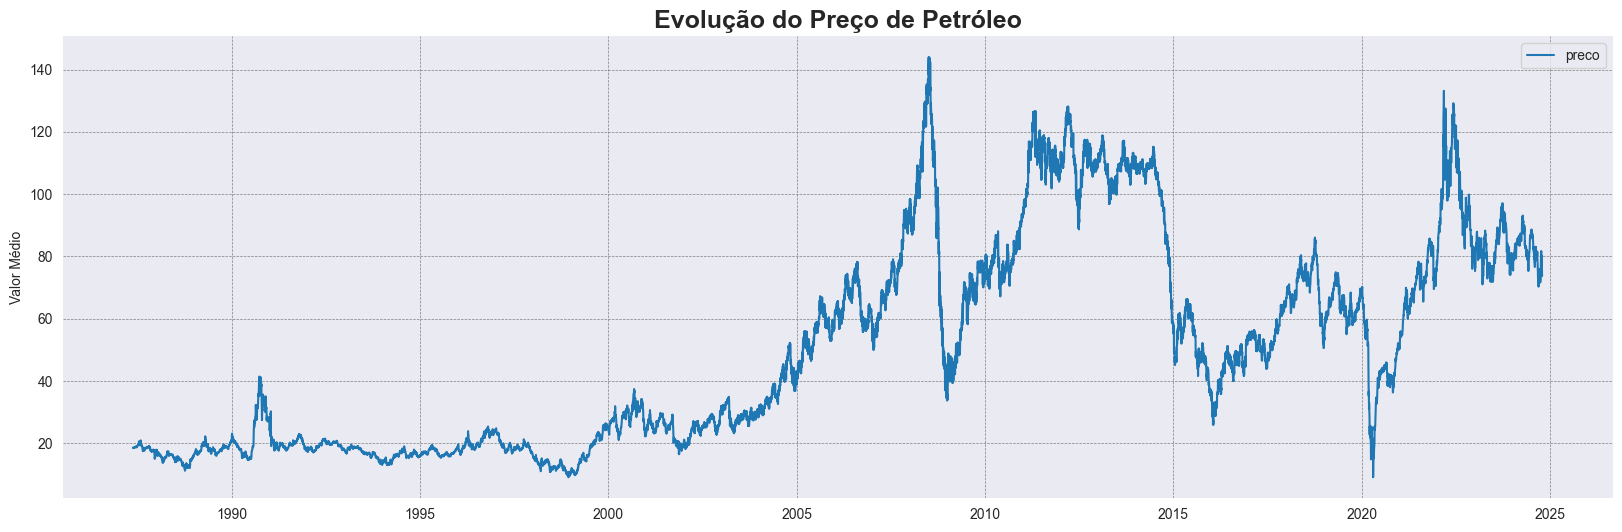

In [51]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# plotando informaçoes do grafico
ax = sns.lineplot(data=dados_petroleo.groupby('data').agg({'preco':'mean'}))
ax.set_title('Evolução do Preço de Petróleo', fontsize=18, weight='bold')
ax.set_ylabel('Valor Médio')
ax.set_xlabel('')

plt.show()

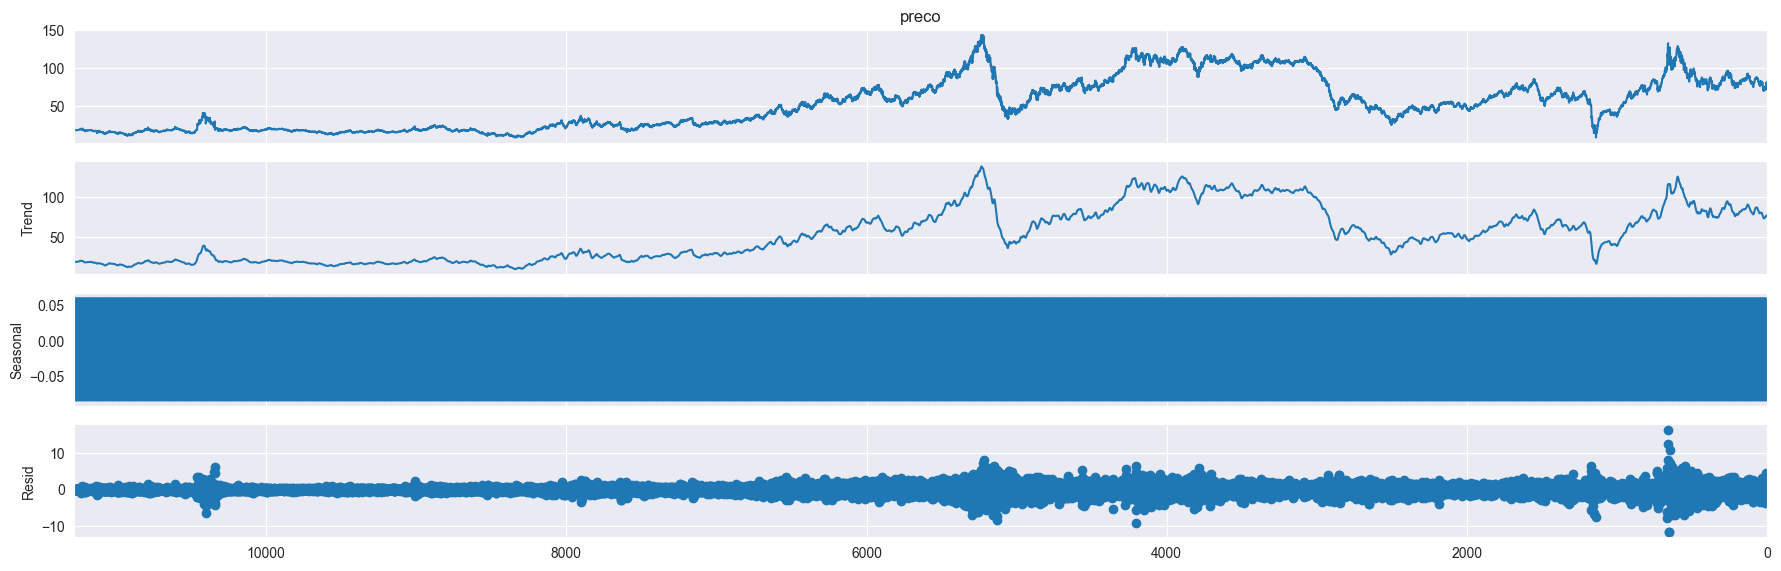

In [58]:
dados_petroleo = dados_petroleo.sort_values(by='data')
decomposicao = seasonal_decompose(dados_petroleo['preco'], model='additive', period=12)

fig = decomposicao.plot()
fig.set_size_inches(20, 6)
plt.show()

Analisando a serie no decorrer do tempo, tivemos tendências contrarias em períodos diferentes.

* Entre 2005 e 2009 forte tendência de aumento de preços seguido por uma queda brusca
* Entre 2010 e 2012 novo aumento seguido por 3 anos sem queda ou novos aumentos
* 2015 novos aumentos que seguiram até 2020
* Entre 2020 e 2023 nova tendência de aumento seguido por queda


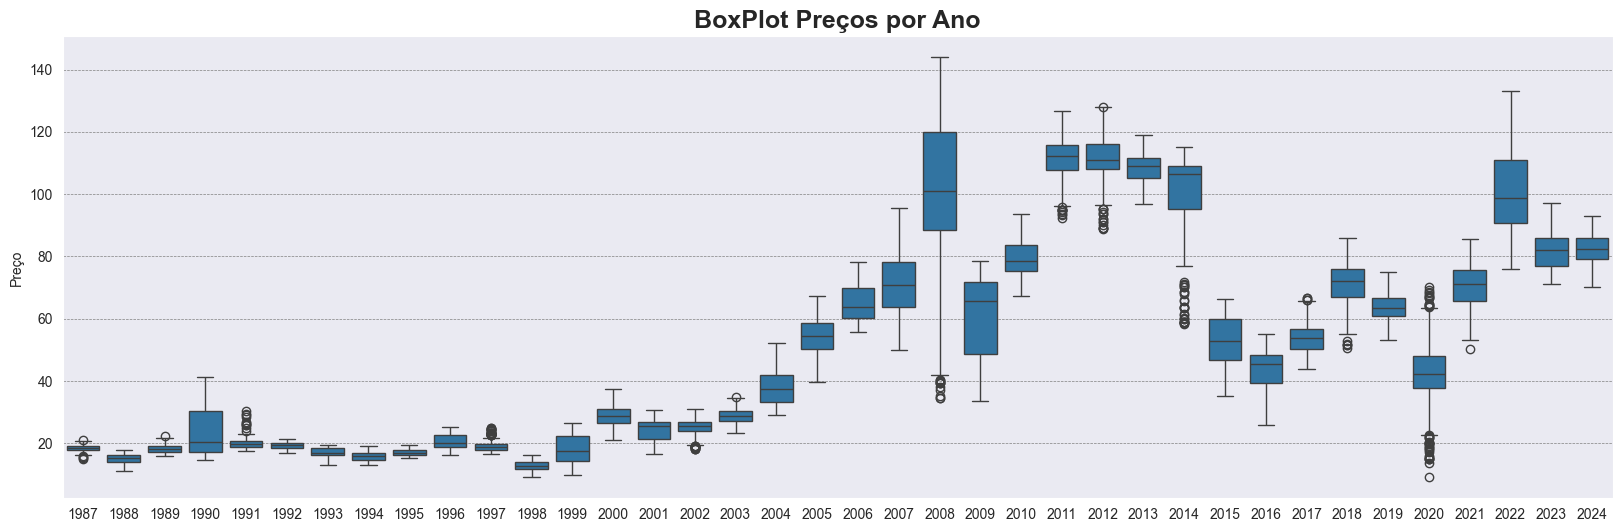

In [180]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax = sns.boxplot(data=dados_petroleo, x='ano', y='preco')
ax.set_title('BoxPlot Preços por Ano', fontsize=18, weight='bold')
ax.set_ylabel('Preço')
ax.set_xlabel('')

plt.show()

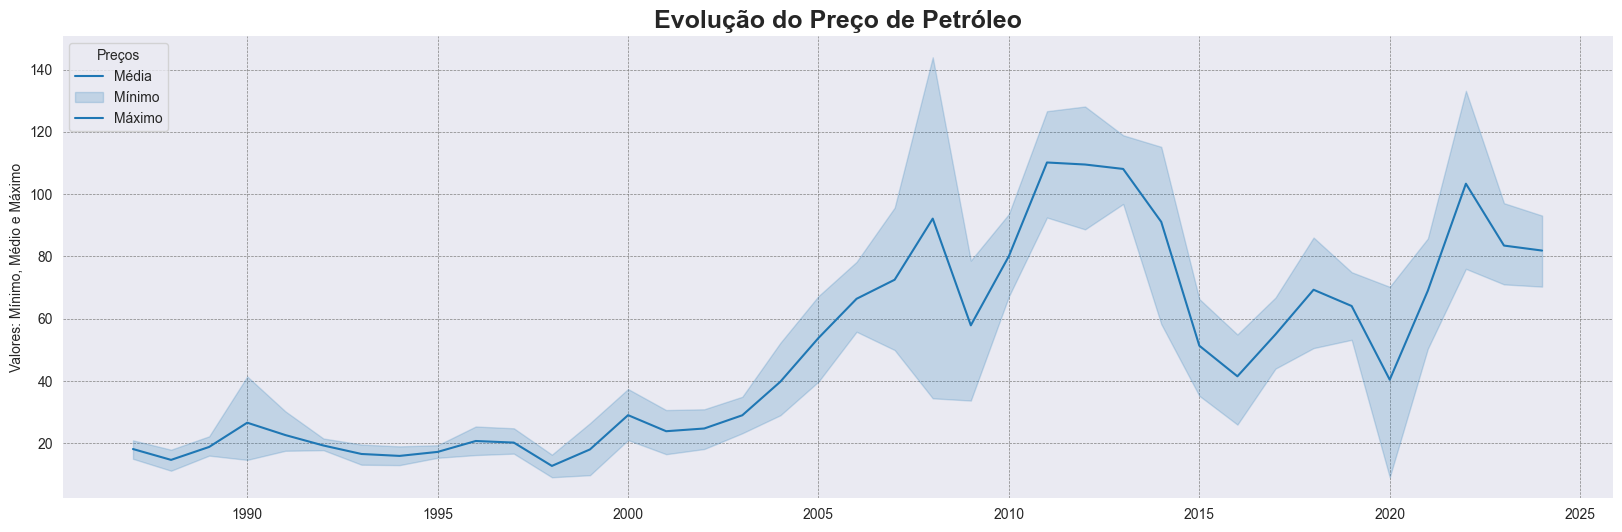

In [99]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# plotando o grafico
ax = sns.lineplot(data=dados_petroleo.groupby('ano').agg({'preco' : ['mean', 'min', 'max']}))
ax.set_title('Evolução do Preço de Petróleo', fontsize=18, weight='bold')
ax.set_ylabel('Valores: Mínimo, Médio e Máximo')
ax.set_xlabel('')

# Adicionando a legenda
ax.legend(title='Preços', labels=['Média', 'Mínimo', 'Máximo'], loc='upper left')

plt.show()


Avaliando os limites de preço por ano, 2008 foi o ano que tivemos com maior instabilidade de preço